# RNAASDB Dataset Analysis

- Overview of the dataset and summary statistics

In [1]:
import multiprocessing as mp

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from rna_sdb.data import RNASDBDatasetModule
from rna_sdb.datasets import RNASDB
from rna_sdb.datasets.rna_sdb import train_cluster

## Summary statistics and distribution

In [3]:
df_parsed_align = RNASDB.load_parsed_align()

print(f'Total number of structures: {len(df_parsed_align):,}')
print(f'Total number of RNA families: {len(df_parsed_align["rfam_family"].unique()):,}')

Total number of structures: 3,100,307
Total number of RNA families: 4,168


In [18]:
df_counts = df_parsed_align.groupby('rfam_family').count()['seq_id'].to_frame()

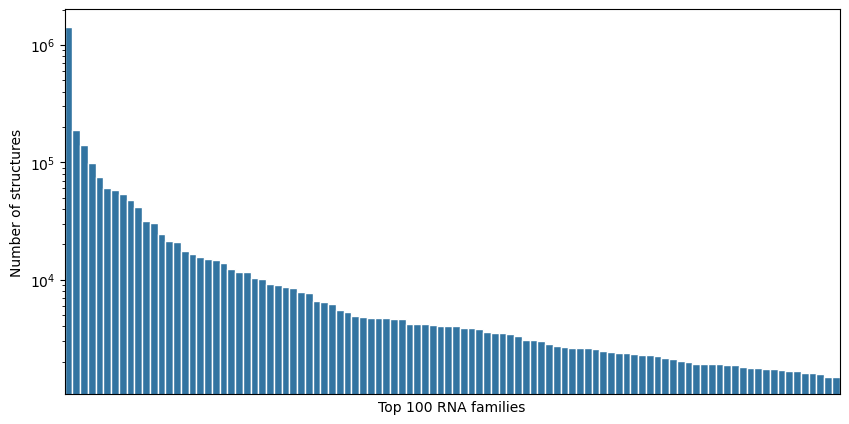

In [61]:
# Bar plot

plt.figure(figsize=(10, 5))
sns.barplot(df_counts.nlargest(100, 'seq_id'), x='rfam_family', y='seq_id', width=1.0, edgecolor='white')
plt.yscale('log')
plt.xticks([])
plt.xlabel('Top 100 RNA families')
plt.ylabel('Number of structures')
plt.show()

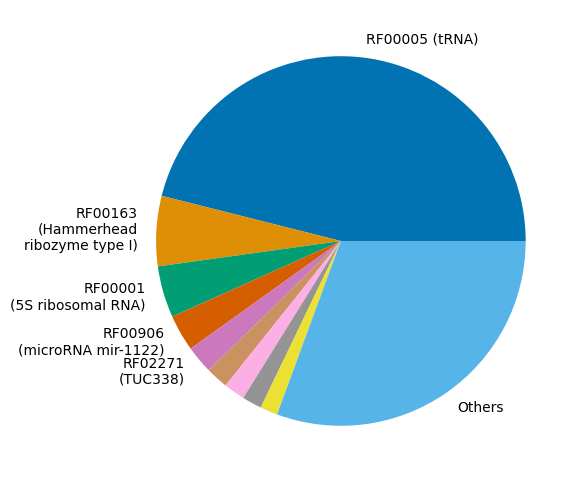

In [148]:
# Pie chart

top_counts = list(df_counts.nlargest(9, 'seq_id')['seq_id'])
remaining_count = df_counts['seq_id'].sum() - sum(top_counts)
top_counts = top_counts + [remaining_count]
top_ratios = [count / df_counts['seq_id'].sum() for count in top_counts]
labels = list(df_counts.nlargest(9, 'seq_id').index) + ['Others']

plt.figure(figsize=(6, 6))
labels[0] = 'RF00005 (tRNA)'
labels[1] = 'RF00163\n(Hammerhead\nribozyme type I)'
labels[2] = 'RF00001\n(5S ribosomal RNA)'
labels[3] = 'RF00906\n(microRNA mir-1122)'
labels[4] = 'RF02271\n(TUC338)'
labels[5] = ''
labels[6] = ''
labels[7] = ''
labels[8] = ''
plt.pie(top_ratios, labels=labels, colors=sns.color_palette('colorblind', n_colors=10))
plt.show()

## Overview of RNAASDB and ArchiveII splits

In [187]:
splits = ['split_1', 'split_2', 'split_3', 'split_4', 'split_5', 'split_6', 'split_7', 'split_8']
for split in splits:
    dataset = RNASDBDatasetModule(batch_size=1, split_name=split, max_seq_len=None)
    dataset.setup('test')

    num_train = len(dataset.rnasdb.df_train) + len(dataset.rnasdb.df_val)
    num_train_families = len(dataset.rnasdb.df_train['rfam_family'].unique()) + len(dataset.rnasdb.df_val['rfam_family'].unique())
    num_test = len(dataset.rnasdb.df_test)
    num_test_families = len(dataset.rnasdb.df_test['rfam_family'].unique())

    print(f'Training - Number of structures: {num_train:,}, Number of families: {num_train_families:,}')
    print(f'Test - Number of structures: {num_test:,}, Number of families: {num_test_families:,}')
    print(f'Number of structures in ArchiveII: {len(dataset.df_archiveII)}')

Initializing RNASDB with split: split_1
Loading cached dataframes: /home/andrewjung/rna_sdb/datasets/rna_sdb/split_1_cache_train.pq, /home/andrewjung/rna_sdb/datasets/rna_sdb/split_1_cache_test.pq
Train and validation split: 1289483, 157670 (10.9%)
Before filtering non-canonical bases: 3966
After filtering non-canonical bases: 3966
Training - Number of structures: 1,447,153, Number of families: 2,190
Test - Number of structures: 1,453,702, Number of families: 1,914
Number of structures in ArchiveII: 1019
Initializing RNASDB with split: split_2
Loading cached dataframes: /home/andrewjung/rna_sdb/datasets/rna_sdb/split_2_cache_train.pq, /home/andrewjung/rna_sdb/datasets/rna_sdb/split_2_cache_test.pq
Train and validation split: 2139199, 239916 (10.1%)
Before filtering non-canonical bases: 3966
After filtering non-canonical bases: 3966
Training - Number of structures: 2,379,115, Number of families: 1,957
Test - Number of structures: 355,837, Number of families: 2,148
Number of structures i

## Examples with similar structures or sequences
Look for cases with
- Similar sequences resulting in similar structures
- Similar sequences resulting in different structures
- Different sequences resulting in similar structures

In [2]:
dataset = RNASDBDatasetModule(batch_size=1, split_name='split_1', max_seq_len=None)
dataset.setup('test')
df = dataset.rnasdb.df_train

Initializing RNASDB with split: split_1
Loading cached dataframes: /home/andrewjung/rna_sdb/datasets/rna_sdb/split_1_cache_train.pq, /home/andrewjung/rna_sdb/datasets/rna_sdb/split_1_cache_test.pq
Train and validation split: 1302222, 144931 (10.0%)
Before filtering non-canonical bases: 3966
After filtering non-canonical bases: 3966


In [5]:
# Similar sequences resulting in similar structures

example_1 = df[(df['rfam_family'] == 'RF00001') & (df['cluster_id'] == 783)].nlargest(1, 'similarity').iloc[0]
print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])
print(example_1['similarity'])

example_2 = df[(df['rfam_family'] == 'RF00001') & (df['cluster_id'] == 783)].nlargest(10, 'similarity').iloc[9]
print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])
print(example_2['similarity'])

example_3 = df[(df['rfam_family'] == 'RF00001') & (df['cluster_id'] == 783)].nsmallest(1, 'similarity').iloc[0]
print(example_3['seq_id'])
print(example_3['seq'])
print(example_3['db_structure'])
print(example_3['similarity'])

JNFL01001372.1/467-594
UACGGCGGUCACAGCGAGGGGGGAAACGCCCGGGUCCCAUCCGAACCCCGGGAAAGCCUAAAGCCCCCUCAAGCCGCCGAUGGUACUGCACGGGAGACUGGUGUGGGAGAGUAGGGACACCGCCGAAC
(((((((((....((..(((((...((...((((((......))..))))))...........)))))....))(.((.((..(.((....((....))......)).).)).)))..))))))))).
100.0
JNFL01002161.1/243-127
UACGGCGGUCACAGCGAGGGGGAAACGCCCGGUCCCAUUCCGAACCCGGAAGCUAAGCCCCUCAGCGCCGAUGGUACUGCACGGGAGACUGUGUGGGAGAGUAGGACACCGCCGAAC
(((((((((....((.(((((...((..((((((.......))..))))..))....)))))..))(((.((..(.((....((....)).....)).).)).))).))))))))).
97.44
MIGZ01000135.1/7522-7636
UACGGCGGUCCAUAGCGACAGGGAAACGCCCGGACCCAUCCCGAACCCGGAAGCUAAGCCUGCCAGCGCCAAUGAUACUGCCCACCACGGGCGGAAAAGUAGGACACCGCCGAAC
(((((((((.....((.(((((...((..((((((.......))..))))..))....)))))..))(((.((..(.((.............)).)..)).))).))))))))).
80.0


In [6]:
# Different sequences resulting in similar structures

example_1 = df[(df['rfam_family'] == 'RF00001') & (df['cluster_id'] == 2037)].nlargest(1, 'similarity').iloc[0]
print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])
print(example_1['similarity'])

example_2 = df[(df['rfam_family'] == 'RF00001') & (df['cluster_id'] == 4301)].nlargest(1, 'similarity').iloc[0]
print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])
print(example_2['similarity'])

JH413843.1/228024-227904
CCUGGCGACAAUAGCGGUUGGAACUGGAACCACCUGAAUCCAUCUCGAACUCAGAAGUGAAACGAACAUGCGCCAAUGAUAGUGUGAGGUUUCCUCAUGUGAAAGUAGGUCAUCGCCAGGG
(((((((((....((.(((((........((..((((((.......))..))))..))....)))))..))(((.((..(.((...((....)).....)).).)).))).))))))))).
100.0
CM000939.1/202379981-202380099
GAUUAUACUUGCCCAACUCUAAAGACACACAGUCUGAACUAAUCCUGGAAGCCAAGUAGGGUCAGACCUGGUUAGUACUUGGAUGGGAGUUCUCCAGUGAAUGCCAGGUGCUGUAUGCU
(((....((.......(((((...((..((((((......))..))))..))....)))))..))(((.((....(.((.....((....)).....)).)..)).)))))).......
100.0


In [3]:
df = dataset.rnasdb.df_test
df = df[df['rfam_family'] != 'RF00005']
dataset_filtered = train_cluster(df, num_threads=mp.cpu_count(), s=0.9)

Assigning cluster metadata to training sequences...


100%|██████████| 6908/6908 [00:00<00:00, 1597697.93it/s]


In [23]:
# An example from cluster_id == 6568

example_1 = dataset_filtered[dataset_filtered['seq_id'] == 'AE009439.1/203478-203537'].iloc[0]
example_2 = dataset_filtered[dataset_filtered['seq_id'] == 'AP006878.1/1226898-1226844'].iloc[0]

print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])
print(example_1['similarity'])
print(example_1['rfam_family'])

print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])
print(example_2['similarity'])
print(example_2['rfam_family'])

# An example from cluster_id == 6648

example_1 = dataset_filtered[dataset_filtered['seq_id'] == 'BA000001.2/56302-56359'].iloc[0]
example_2 = dataset_filtered[dataset_filtered['seq_id'] == 'CP001463.1/1011818-1011764'].iloc[0]

print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])
print(example_1['similarity'])
print(example_1['rfam_family'])

print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])
print(example_2['similarity'])
print(example_2['rfam_family'])

# An example from cluster_id == 6872

example_1 = dataset_filtered[dataset_filtered['seq_id'] == 'CP000609.1/744870-744906'].iloc[0]
example_2 = dataset_filtered[dataset_filtered['seq_id'] == 'CP000742.1/270079-270115'].iloc[0]

print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])
print(example_1['similarity'])
print(example_1['rfam_family'])

print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])
print(example_2['similarity'])
print(example_2['rfam_family'])

AE009439.1/203478-203537
CCCGAUGACGAGUGAGCUGUUAGCCGAACGCUAUUAUGGGGAGAGGAUGGCUGGCCGAGG
((........................................................))
100.0
RF01135
AP006878.1/1226898-1226844
GCCGAUGACGAGCGUUAGCCACGCUGACUGAUGAGGAAAAGAGGGUUAGCCGAGG
.............(((((((...((..............))..))))))).....
80.0
RF01273
BA000001.2/56302-56359
UCCGAUGAUGGGAACAGGGUAGCUGCCGAGUUGAUGAGGAAGCCGUUCCAGACUGAGG
.((.......(.(((..(((....)))..(((........))).))).).......))
100.0
RF01275
CP001463.1/1011818-1011764
CCCGAUGAUUGGAACAAGAGUGAGCUGAGUUGUGAUGACCGACUUCUCGCUGAGG
((...................................................))
81.82
RF01308
CP000609.1/744870-744906
CUAAAAGAAUAACUUGCAAAAUAACAAGCAUUGAAAC
............((((........)))).........
100.0
RF01375
CP000742.1/270079-270115
GUUUCAAUGCUUGUUCUAAUGCAUUAUGCUCUUUUAC
.....((.((.(((......)))....))..))....
83.78
RF01378


In [ ]:
df = dataset.rnasdb.df_test
df = df[df['rfam_family'] != 'RF00005']
dataset_filtered = train_cluster(df, num_threads=mp.cpu_count())

df_cluster = dataset_filtered[dataset_filtered['cluster_id'] == 1346]

df_family_1 = df_cluster[df_cluster['rfam_family'] == 'RF00023']
example_1 = df_family_1[df_family_1['seq'].str.len() == 148].iloc[0]
print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])
print(example_1['similarity'])

df_family = df_cluster[df_cluster['rfam_family'] == 'RF00005']
example_2 = df_family[df_family['seq'].str.len() == 68].iloc[0]
print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])
print(example_1['similarity'])

In [7]:
df = dataset.rnasdb.df_test
df_subset = pd.concat([df[df['rfam_family'] == 'RF00023'], df[df['rfam_family'] == 'RF00005']], axis=0)
dataset_filtered = train_cluster(df_subset, num_threads=mp.cpu_count())

df_cluster = dataset_filtered[dataset_filtered['cluster_id'] == 1346]

df_family_1 = df_cluster[df_cluster['rfam_family'] == 'RF00023']
example_1 = df_family_1[df_family_1['seq'].str.len() == 148].iloc[0]
print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])
print(example_1['similarity'])

df_family = df_cluster[df_cluster['rfam_family'] == 'RF00005']
example_2 = df_family[df_family['seq'].str.len() == 68].iloc[0]
print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])
print(example_1['similarity'])

Assigning cluster metadata to training sequences...


100%|██████████| 36048/36048 [00:00<00:00, 155612.39it/s]


IndexError: single positional indexer is out-of-bounds

In [13]:
dataset_filtered[dataset_filtered['seq_id'] == 'AGCT01061508.1/253-400']

,seq_id,seq,structure,db_structure,rfam_family,pair_indices,cluster_id,cluster_size,seed,similarity
3853,AGCT01061508.1/253-400,GGGGAUGUUCUGGCUUCGACGCUGGUAAUGAAACUCAAUGAUGCAU...,".......,.,,,,,,,,............--..................",.................................................,RF00023,"[[54, 55, 56, 57, 58, 59, 60, 116, 117, 118, 1...",1499,44,False,85.81


In [14]:
dataset_filtered[dataset_filtered['seq_id'] == 'AWGM01013995.1/13082-13015']

,seq_id,seq,structure,db_structure,rfam_family,pair_indices,cluster_id,cluster_size,seed,similarity
1154260,AWGM01013995.1/13082-13015,GUAGUUAGCUUAGUUGGUAGUGCGUCUGCCUAGUAAGCGCUAGGCC...,"((((,.,<<<<___.____>>>>,<<<<<_______>>>>>,,,.,...",((((...((((........)))).(((((.......)))))........,RF00005,"[[0, 1, 2, 3, 7, 8, 9, 10, 24, 25, 26, 27, 28,...",1346,1079,False,80.88


In [10]:
df_family_1[df_family_1['seq'].str.len() == 148]

,seq_id,seq,structure,db_structure,rfam_family,pair_indices,cluster_id,cluster_size,seed,similarity


In [9]:
df_cluster = dataset_filtered[dataset_filtered['cluster_id'] == 1346]

df_family_1 = df_cluster[df_cluster['rfam_family'] == 'RF00023']
example_1 = df_family_1[df_family_1['seq'].str.len() == 148]].iloc[0]
print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])
print(example_1['similarity'])

df_family = df_cluster[df_cluster['rfam_family'] == 'RF00005']
example_2 = df_family[df_family['seq'].str.len() == 68].iloc[0]
print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])
print(example_1['similarity'])

SyntaxError: unmatched ']' (1697213214.py, line 4)

In [71]:
df_cluster = dataset_filtered[dataset_filtered['cluster_id'] == 1346]

example_1 = df_cluster.nlargest(1, 'similarity').iloc[0]
print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])

example_2 = df_cluster[df_cluster['rfam_family'] == 'RF00005'].nlargest(10, 'similarity').iloc[1]
print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])

MEQY01000023.1/7234-6870
GGGGGCGACCUGGCUUCGACGUGGGUAGUGAAGCAGCGCAGGGCAUACCGAGGACCAGUGACCUCGUAAAUCCAUCUGGAACGCAAUAACUGCGAACGACGAACGUUUCGCACUCGCCGCCUAAUACCGGCGAGCUCUGCUCCGGUUGGUUCAUGGGCCGGGUAGCGCAAGCUACGGCAGAGUCAUUUACAUGAGCUCGCGUGCUGCAGGGUCACUUUGCAGCACGUCAAAUCCAAGGUGGCUCGCCCGUUGUCAGCCCGCCGGGCCGGCGGACACCGGGUCAAAACCAAGUUGGCCAGGCUAAGUAUGUAGAACUGCCUGUAGAGCGCUUGCGGACGCGGGUUCGAUUCCCGCCGCCUCCACCA
(((((((..........((((((((((((..(((((.(((((((((((.....(((((((.............)))))))................................((((((((......))))))))((((((.(((((..........)))))...............))))))................(((((((((...........))))))))).................((((((((((.(((.........))).)))))))))).......................)))))...))))))))))).)))))))))))).(((((.......))))))))))))....
AWGM01015570.1/4497-4440
UAGCCUAGUUGGUAGUGCGUCUGCCUUGUAAGCGCUAGGCCGCGGGUUCGAUUCCCGC
..((((........)))).(((((.......))))).....(((((.......)))))


In [75]:
df_family = df_cluster[df_cluster['rfam_family'] == 'RF00005']
df_family[df_family['seq'].str.len() == 68]

,seq_id,seq,structure,db_structure,rfam_family,pair_indices,cluster_id,cluster_size,seed,similarity
1154260,AWGM01013995.1/13082-13015,GUAGUUAGCUUAGUUGGUAGUGCGUCUGCCUAGUAAGCGCUAGGCC...,"((((,.,<<<<___.____>>>>,<<<<<_______>>>>>,,,.,...",((((...((((........)))).(((((.......)))))........,RF00005,"[[0, 1, 2, 3, 7, 8, 9, 10, 24, 25, 26, 27, 28,...",1346,1079,False,80.88


In [76]:
example_2 = df_family[df_family['seq'].str.len() == 68].iloc[0]
print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])

AWGM01013995.1/13082-13015
GUAGUUAGCUUAGUUGGUAGUGCGUCUGCCUAGUAAGCGCUAGGCCGCGGGUUCGAUUCCCGCCUGCA
((((...((((........)))).(((((.......))))).....(((((.......))))))))).


In [78]:
df_cluster = dataset_filtered[dataset_filtered['cluster_id'] == 1499]

example_1 = df_cluster.nlargest(1, 'similarity').iloc[0]
print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])

example_2 = df_cluster[df_cluster['rfam_family'] == 'RF00005'].nlargest(10, 'similarity').iloc[0]
print(example_2['seq_id'])
print(example_2['seq'])
print(example_2['db_structure'])

JFYL01000015.1/47713-47353
GGGGAUGUUCCUGGCUUCGACGCUGGUGAUGAAACUCAUAGAUGCAUGCCGAGAGCGCAUUUUCUCUCGUAAAUAAAAUUUGCAUUUUAAAUAGUCGCAAACGACGAAUCUUACGCUCUAGCUGCCUAAGGGCAGCUUGUCCGCAUCUCUGAAUACUUGUGGUUAGAGAUCCCGACUGAAGCGCACGCACACAAGUCCGUAUAACAUCAAGCCUUGGGGUGUUGUACUAAACUUAAAGGAUCGCUCUCUUAACCCUGUUCGUCGGGUCUUUGAGGGUUAAAACAAUAGACGAUAUCUAAGCAUGUAGUAAUCUCGAGUGUAGUGCUUGCGGACGCGGGUUCGACUCCCGCCAUCUCCACCA
(((((((...........((((((((((((..(((((..((((((((((......(((((((...............)))))))................................(((((((((......))))))))).....((((..(((.......))).)))).............................(((((((((...........)))))))))...............(((((((((.(((........)))..)))))))))......................)))))....))))).))))).)))))))))))).(((((.......))))))))))))....
AOTI010755899.1/1055-999
AGCUCAGUUGGUAAAGCACAAGGCUUUUAACCUUGUGCACGUGGAUUCAAGUCCCAU
.((((........)))).(((((.......))))).....(((((.......)))))


In [80]:
df_family_1 = df_cluster[df_cluster['rfam_family'] == 'RF00023']

In [87]:
df_family_1 = df_cluster[df_cluster['rfam_family'] == 'RF00023']
example_1 = df_family_1[df_family_1['seq'].str.len() == 148].iloc[0]
print(example_1['seq_id'])
print(example_1['seq'])
print(example_1['db_structure'])

AGCT01061508.1/253-400
GGGGAUGUUCUGGCUUCGACGCUGGUAAUGAAACUCAAUGAUGCAUGUCGAGUGAGUAUGUCCACUCGUAAAUAAAAUAUACAUUUUAAACUAGUCGCAAACGACGAAACUUACGCUCUAGCAGCCUAAGGGCUGCUUGGGACGGCAC
......................................................(((((((...............))))))).................................(((((((((......)))))))))........


In [85]:
df_family_1['seq'].str.len().min()

148